# PyTorch Neural Network Classification

## Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## Imports

In [2]:
import requests
import numpy as np 
import pandas as pd 
import torch 
import matplotlib.pyplot as plt

from torch import nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from pathlib import Path 


In [4]:
%load_ext autoreload
%autoreload 2 

In [ ]:
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'SEED: {SEED}')
print(f'Device: {device}')
print(f'torch version: {torch.__version__}')

SEED: 42
Device: cuda
torch version: 2.7.0+cu126


## Building Dataset

In [11]:
# Will be using the sklearn.datasets -> make_circles 

# Number of samples 
n_samples = 1000

X, Y = make_circles(
    n_samples= n_samples,
    noise= 0.3, 
    random_state= SEED
)

In [13]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (1000, 2)
Shape of Y: (1000,)


In [15]:
circles = pd.DataFrame({"X1": X[:, 0],
                   "X2": X[:, 1],
                   'Y': Y})

circles.head(10)

,X1,X2,Y
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
5,-0.347874,1.103071,1
6,-0.046008,0.834056,1
7,0.610994,0.306608,1
8,-0.255312,-0.879601,1
9,0.025255,1.300938,0


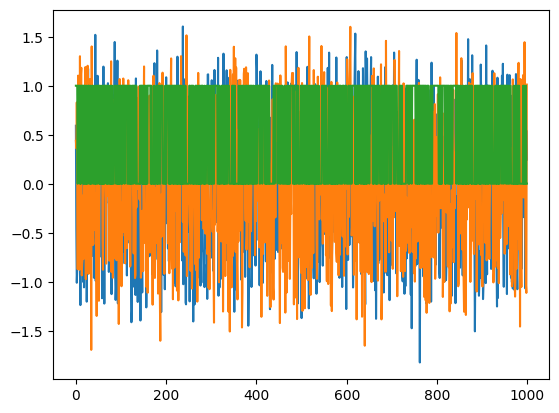

In [20]:
plt.plot(circles)
plt.show()